#Portfolio Assets Allocation Optimization

This script offers investors and financial analysts a comprehensive tool for analyzing and optimizing investment portfolios. By leveraging market data and financial models, it provides valuable insights into portfolio performance and assists in making informed investment decisions.

1. Portfolio Analysis: Retrieve market data and calculate key metrics like market capitalization, returns, risk premium, and volatility to understand portfolio status.
2. Model Comparison: Compare portfolio returns generated by different financial models to evaluate investment strategies.
3. Portfolio Optimization: Determine optimal portfolio weights that maximize the Sharpe Ratio, balancing risk and return.
4. Visual Representation: Visualize optimized portfolio weights using pie charts for easier understanding of portfolio composition.

# Function/Background

In [1]:
#!pip install yfinance

In [2]:
import pandas as pd
import yfinance as yf
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

Fetch_data_from_yahoo function is defined to download historical stock data from Yahoo Finance.
The function takes three parameters:
1. columns_of_firms: A list of symbols or tickers of the firms you want to fetch data for.
2. end_date: The end date of the data you want to fetch.
3. months_to_include: The number of months of data you want to include.
Stock data is downloaded using yf.download() function.
Only 'Adj Close' columns are selected and column names are cleaned.

Percentage change is calculated, NaN values are dropped, and the date column is converted to datetime.
The function returns the processed stock data.

In [3]:
def fetch_data_from_yahoo(columns_of_firms, Enddate, Months_to_include):
  Stock = yf.download(columns_of_firms, start=Enddate - pd.DateOffset(months=Months_to_include+1), end=Enddate, interval="1mo")

# Filter only 'Adj Close' columns
  adj_close_columns = [col for col in Stock.columns if 'Adj Close' in col]
  Stock_adj_close = Stock[adj_close_columns]

# Filter only 'Adj Close' columns
  adj_close_columns = [col for col in Stock.columns if 'Close' in col]
  Stock_adj_close = Stock[adj_close_columns]

# Clean column names
  Stock_adj_close.columns = [col[1] for col in Stock_adj_close.columns]
  Stock = Stock_adj_close.reset_index()
  Stock = Stock.fillna("")
  Stock.iloc[:, 1:] = Stock.iloc[:, 1:].pct_change()
  Stock = Stock.dropna()
  Stock["Date"] = pd.to_datetime(Stock["Date"])
  return Stock


# Basic Data Input

## Retrieves the lists of stocks from each index

This code retrieves the list of S&P 500/S&P 100/Dow Jones/NASDAQ companies from Wikipedia and stores it in a DataFrame.

Sets the URL of the Wikipedia page containing the list. Uses the pd.read_html() function to scrape tables from the Wikipedia page. The match parameter is set to 'Symbol' to match the column name 'Symbol', which is present in the table we want. [0] is used to select the first table found on the page, assuming it contains the components. The data is then stored in the DataFrame. Displays the first few rows of the DataFrame to verify that the data has been successfully retrieved.

In [4]:
import pandas as pd
url = 'https://en.wikipedia.org/wiki/Dow_Jones_Industrial_Average'
dow_jones_components = pd.read_html(url, match='Symbol')[0]
dow_jones_components.head()

,Company,Exchange,Symbol,Industry,Date added,Notes,Index weighting
0,3M,NYSE,MMM,Conglomerate,1976-08-09,As Minnesota Mining and Manufacturing,1.54%
1,American Express,NYSE,AXP,Financial services,1982-08-30,NaN,3.64%
2,Amgen,NASDAQ,AMGN,Biopharmaceutical,2020-08-31,NaN,4.80%
3,Amazon,NASDAQ,AMZN,Retailing,2024-02-26,NaN,2.93%
4,Apple,NASDAQ,AAPL,Information technology,2015-03-19,NaN,3.04%


In [5]:
url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'
sp_500_components = pd.read_html(url, match='Symbol')[0]
sp_500_components.head()

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
3,ABBV,AbbVie,Health Care,Biotechnology,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989


In [6]:
# Fetching the Dow Jones Industrial Average components from Wikipedia
url = 'https://en.wikipedia.org/wiki/S%26P_100'
sp_100_components = pd.read_html(url, match='Symbol')[0]
sp_100_components.head()

,Symbol,Name,Sector
0,AAPL,Apple Inc.,Information Technology
1,ABBV,AbbVie,Health Care
2,ABT,Abbott Laboratories,Health Care
3,ACN,Accenture,Information Technology
4,ADBE,Adobe Inc.,Information Technology


In [7]:
# Fetching the NASDAQ-100 components from Wikipedia
url = 'https://en.wikipedia.org/wiki/NASDAQ-100'
nasdaq_100_components = pd.read_html(url, match='Ticker')[0]
nasdaq_100_components.head()

,Company,Ticker,GICS Sector,GICS Sub-Industry
0,Adobe Inc.,ADBE,Information Technology,Application Software
1,Airbnb,ABNB,Consumer Discretionary,"Hotels, Resorts & Cruise Lines"
2,Alphabet Inc. (Class A),GOOGL,Communication Services,Interactive Media & Services
3,Alphabet Inc. (Class C),GOOG,Communication Services,Interactive Media & Services
4,Amazon,AMZN,Consumer Discretionary,Broadline Retail


In [8]:
#Randomly selects a set symbols from the index components DataFrame and prints them.
import random
random_selection = random.sample(sp_100_components['Symbol'].tolist(), 12)
print(random_selection)

['DOW', 'CL', 'BMY', 'DHR', 'ORCL', 'WMT', 'JNJ', 'JPM', 'AMT', 'CMCSA', 'MMM', 'V']


## Define Parameters: Stocks, Factors, and Date with a period of time

In [9]:
columns_of_firms = ['CSCO', 'NFLX', 'BAC', 'TMO', 'T', 'PM', 'GM', 'GOOGL', 'RTX', 'COST', 'EMR', 'F']
columns_of_factors = ["SIZE", "VLUE", "MTUM",	"QUAL",	"USMV",	"DGRO"]

In [10]:
# Download stock data
Stock = yf.download(columns_of_firms, interval="1mo")

# Find the first date for each ticker
first_dates = {}
for ticker in columns_of_firms:
    # Get the adjusted close column for the ticker
    ticker_data = Stock['Adj Close'][ticker]
    # Find the first non-NaN value's date
    first_valid_index = ticker_data.first_valid_index()
    # Store the date
    first_dates[ticker] = first_valid_index

# Convert the dictionary to a DataFrame
First_Dates = pd.DataFrame(list(first_dates.items()), columns=['Ticker', 'First Date'])
# Sort the DataFrame by the date
First_Dates = First_Dates.sort_values(by='First Date', ascending=False)
# Display the first dates
print(First_Dates)

[*********************100%***********************]  12 of 12 completed


   Ticker                First Date
6      GM 2010-12-01 00:00:00+00:00
5      PM 2008-04-01 00:00:00+00:00
7   GOOGL 2004-09-01 00:00:00+00:00
1    NFLX 2002-06-01 00:00:00+00:00
0    CSCO 1990-03-01 00:00:00+00:00
9    COST 1986-08-01 00:00:00+00:00
2     BAC 1985-01-01 00:00:00+00:00
3     TMO 1985-01-01 00:00:00+00:00
8     RTX 1985-01-01 00:00:00+00:00
10    EMR 1985-01-01 00:00:00+00:00
11      F 1985-01-01 00:00:00+00:00
4       T 1983-12-01 00:00:00+00:00


In [68]:
Enddate = "2024-09-04"
Enddate = pd.to_datetime(Enddate)
Months_to_include = 60

# Data Collection and Organization

In [69]:
#Fetches historical stock and factor data using the fetch_data_from_yahoo function defined earlier.
Stock = fetch_data_from_yahoo(columns_of_firms, Enddate, Months_to_include)
Stock.index = Stock['Date'].values
Stock = Stock.drop(columns=['Date'])
Stock.head()

[*********************100%***********************]  12 of 12 completed


,BAC,COST,CSCO,EMR,F,GM,GOOGL,NFLX,PM,RTX,T,TMO
2019-10-01,0.071992,0.031238,-0.038454,0.049207,-0.062227,-0.008538,0.030840,0.073948,0.072567,0.051714,0.017178,0.036770
2019-11-01,0.065558,0.009088,-0.046306,0.052887,0.054715,-0.031216,0.035979,0.094812,0.018296,0.033152,-0.028839,0.039638
2019-12-01,0.057023,-0.019646,0.058486,0.032494,0.026490,0.016667,0.027069,0.028316,0.026046,0.009573,0.045479,0.034783
2020-01-01,-0.067859,0.039466,-0.041493,-0.060713,-0.051613,-0.087705,0.069726,0.066508,-0.028088,0.002938,-0.037359,-0.035953
2020-02-01,-0.131892,-0.079798,-0.131390,-0.104984,-0.210884,-0.086553,-0.065279,0.069373,-0.010036,-0.130559,-0.063796,-0.071490


In [70]:
Factor = fetch_data_from_yahoo(columns_of_factors, Enddate, Months_to_include)
Factor.index = Factor['Date'].values
Factor = Factor.drop(columns=['Date'])
Factor.head()

[*********************100%***********************]  6 of 6 completed


,DGRO,MTUM,QUAL,SIZE,USMV,VLUE
2019-10-01,0.019673,0.006457,0.022078,0.013109,-0.002340,0.028401
2019-11-01,0.033826,0.032911,0.044579,0.037838,0.013917,0.036980
2019-12-01,0.019632,0.012826,0.023822,0.020534,0.011721,0.025603
2020-01-01,-0.014975,0.037432,-0.006832,-0.012730,0.023476,-0.037780
2020-02-01,-0.090734,-0.071856,-0.083342,-0.086305,-0.087429,-0.096363


In [71]:
#The fetched stock and factor data are merged together based on the index.
Stock = Stock.merge(Factor, left_index=True, right_index=True)
Stock.tail()

,BAC,COST,CSCO,EMR,F,GM,GOOGL,NFLX,PM,RTX,T,TMO,DGRO,MTUM,QUAL,SIZE,USMV,VLUE
2024-05-01,0.080519,0.120335,-0.010217,0.040638,-0.001646,0.010330,0.059713,0.165226,0.067832,0.061958,0.078745,-0.001301,0.029312,0.053583,0.055938,0.024195,0.029211,0.031303
2024-06-01,-0.005501,0.049513,0.021720,-0.017832,0.033800,0.032674,0.055942,0.051838,-0.000493,-0.068825,0.048847,-0.026374,0.000347,0.044319,0.030288,-0.003406,0.014010,-0.006243
2024-07-01,0.013578,-0.032930,0.019785,0.063090,-0.137161,-0.046061,-0.058249,-0.068946,0.136485,0.170336,0.007326,0.109114,0.046693,-0.020013,0.005973,0.041155,0.036684,0.039919
2024-08-01,0.010915,0.085620,0.043137,-0.100077,0.034196,0.123195,-0.047569,0.116177,0.070597,0.049791,0.033766,0.002821,0.030514,0.033513,0.034928,0.025491,0.049173,0.004090
2024-09-01,-0.001227,-0.015475,-0.009497,-0.031976,-0.018767,-0.027521,-0.036847,-0.037114,0.019629,-0.019053,0.026633,-0.014047,-0.010138,-0.029437,-0.021543,-0.015187,-0.005585,-0.016662


In [72]:
#This section fetches historical data for NASDAQ, Dow Jones, and S&P 500 indexes.
#Renames the columns for clarity and assigns the chosen one as index to the Stock DataFrame.
import yfinance as yf

# Define the ticker symbols for Treasury bonds
Index = ["^IXIC", "^DJI", "^GSPC"]  # NASDAQ, Dow Jones, S%P 500
# Fetch data
Index = yf.download(Index, start=Enddate - pd.DateOffset(months=Months_to_include+1), end=Enddate, interval="1mo")
# Filter only 'Adj Close' columns
adj_close_columns = [col for col in Index.columns if 'Adj Close' in col]
Index_adj_close = Index[adj_close_columns]
# Clean column names
Index_adj_close.columns = [col[1] for col in Index_adj_close.columns]
Index = Index_adj_close.reset_index()
print('Column names cleaned and DataFrame reset.')

[*********************100%***********************]  3 of 3 completed

Column names cleaned and DataFrame reset.


In [73]:
Index = ["^IXIC", "^DJI", "^GSPC"]  # NASDAQ, Dow Jones, S%P 500
Index = fetch_data_from_yahoo(Index, Enddate, Months_to_include)
Index = Index.rename(columns = {"^IXIC": "NASDAQ", "^DJI":"Dow Jones", "^GSPC":"S&P 500"})
Index.tail()

[*********************100%***********************]  3 of 3 completed


,Date,Dow Jones,S&P 500,NASDAQ
56,2024-05-01 00:00:00+00:00,0.023017,0.048021,0.068796
57,2024-06-01 00:00:00+00:00,0.011181,0.034670,0.059610
58,2024-07-01 00:00:00+00:00,0.044069,0.011321,-0.007512
59,2024-08-01 00:00:00+00:00,0.017636,0.022835,0.006490
60,2024-09-01 00:00:00+00:00,-0.015065,-0.021151,-0.032592


In [74]:
Stock['Index'] = Index['S&P 500'].values

In [75]:
#Fetches historical data for risk-free rates of various Treasury bonds.
#Adjusts the data to get monthly rates and assigns the chose one as risk-free rate to the Stock DataFrame.
import yfinance as yf

# Define the ticker symbols for Treasury bonds
risk_free = ["^IRX", "^FVX", "^TNX", "^TYX"]  # 6-month T-bill, 5-year, 10-year, 30-year
# Fetch data
Risk_Free_Rate = yf.download(risk_free, start=Enddate - pd.DateOffset(months=Months_to_include), end=Enddate, interval="1wk")
# Filter only 'Adj Close' columns
adj_close_columns = [col for col in Risk_Free_Rate.columns if 'Adj Close' in col]
Risk_Free_Rate_adj_close = Risk_Free_Rate[adj_close_columns]
# Clean column names
Risk_Free_Rate_adj_close.columns = [col[1] for col in Risk_Free_Rate_adj_close.columns]
Risk_Free_Rate = Risk_Free_Rate_adj_close.reset_index()
print('Column names cleaned and DataFrame reset.')

[*********************100%***********************]  4 of 4 completed


Column names cleaned and DataFrame reset.


In [76]:
Risk_Free_Rate = Risk_Free_Rate.rename(columns = {"^IRX": "TB13W", "^FVX": "TB5", "^TNX": "TB10", "^TYX": "TB30"})
Risk_Free_Rate["Date"] = pd.to_datetime(Risk_Free_Rate["Date"])
Risk_Free_Rate.iloc[:, 1:] = Risk_Free_Rate.iloc[:, 1:]/100
Risk_Free_Rate = Risk_Free_Rate[['Date', 'TB13W', 'TB5', 'TB10', 'TB30']]
Risk_Free_Rate = Risk_Free_Rate.resample('M', on='Date').first().reset_index()
Risk_Free_Rate['Date'] = Risk_Free_Rate['Date'].dt.to_period('M').dt.to_timestamp()
Risk_Free_Rate = Risk_Free_Rate.drop(Risk_Free_Rate.index[0])

Risk_Free_Rate.tail()

,Date,TB13W,TB5,TB10,TB30
56,2024-05-01,0.05243,0.04518,0.04504,0.04646
57,2024-06-01,0.05238,0.04456,0.04430,0.04548
58,2024-07-01,0.05225,0.04218,0.04272,0.04468
59,2024-08-01,0.05075,0.03796,0.03942,0.04225
60,2024-09-01,0.04970,0.03656,0.03844,0.04131


In [77]:
Risk_Free_Rate.head()

,Date,TB13W,TB5,TB10,TB30
1,2019-10-01,0.01623,0.01576,0.01752,0.02215
2,2019-11-01,0.01510,0.01734,0.01933,0.02417
3,2019-12-01,0.01480,0.01669,0.01842,0.02284
4,2020-01-01,0.01498,0.01636,0.01825,0.02284
5,2020-02-01,0.01518,0.01401,0.01578,0.02042


In [78]:
Stock['Risk_Free_Rate'] = Risk_Free_Rate['TB5'].values/12
Stock.head()

,BAC,COST,CSCO,EMR,F,GM,GOOGL,NFLX,PM,RTX,T,TMO,DGRO,MTUM,QUAL,SIZE,USMV,VLUE,Index,Risk_Free_Rate
2019-10-01,0.071992,0.031238,-0.038454,0.049207,-0.062227,-0.008538,0.030840,0.073948,0.072567,0.051714,0.017178,0.036770,0.019673,0.006457,0.022078,0.013109,-0.002340,0.028401,0.020432,0.001313
2019-11-01,0.065558,0.009088,-0.046306,0.052887,0.054715,-0.031216,0.035979,0.094812,0.018296,0.033152,-0.028839,0.039638,0.033826,0.032911,0.044579,0.037838,0.013917,0.036980,0.034047,0.001445
2019-12-01,0.057023,-0.019646,0.058486,0.032494,0.026490,0.016667,0.027069,0.028316,0.026046,0.009573,0.045479,0.034783,0.019632,0.012826,0.023822,0.020534,0.011721,0.025603,0.028590,0.001391
2020-01-01,-0.067859,0.039466,-0.041493,-0.060713,-0.051613,-0.087705,0.069726,0.066508,-0.028088,0.002938,-0.037359,-0.035953,-0.014975,0.037432,-0.006832,-0.012730,0.023476,-0.037780,-0.001628,0.001363
2020-02-01,-0.131892,-0.079798,-0.131390,-0.104984,-0.210884,-0.086553,-0.065279,0.069373,-0.010036,-0.130559,-0.063796,-0.071490,-0.090734,-0.071856,-0.083342,-0.086305,-0.087429,-0.096363,-0.084110,0.001168


In [79]:
Stock.tail()

,BAC,COST,CSCO,EMR,F,GM,GOOGL,NFLX,PM,RTX,T,TMO,DGRO,MTUM,QUAL,SIZE,USMV,VLUE,Index,Risk_Free_Rate
2024-05-01,0.080519,0.120335,-0.010217,0.040638,-0.001646,0.010330,0.059713,0.165226,0.067832,0.061958,0.078745,-0.001301,0.029312,0.053583,0.055938,0.024195,0.029211,0.031303,0.048021,0.003765
2024-06-01,-0.005501,0.049513,0.021720,-0.017832,0.033800,0.032674,0.055942,0.051838,-0.000493,-0.068825,0.048847,-0.026374,0.000347,0.044319,0.030288,-0.003406,0.014010,-0.006243,0.034670,0.003713
2024-07-01,0.013578,-0.032930,0.019785,0.063090,-0.137161,-0.046061,-0.058249,-0.068946,0.136485,0.170336,0.007326,0.109114,0.046693,-0.020013,0.005973,0.041155,0.036684,0.039919,0.011321,0.003515
2024-08-01,0.010915,0.085620,0.043137,-0.100077,0.034196,0.123195,-0.047569,0.116177,0.070597,0.049791,0.033766,0.002821,0.030514,0.033513,0.034928,0.025491,0.049173,0.004090,0.022835,0.003163
2024-09-01,-0.001227,-0.015475,-0.009497,-0.031976,-0.018767,-0.027521,-0.036847,-0.037114,0.019629,-0.019053,0.026633,-0.014047,-0.010138,-0.029437,-0.021543,-0.015187,-0.005585,-0.016662,-0.021151,0.003047


Excess returns are calculated by subtracting the risk-free rate from each stock's return.

In [80]:
Excess_Returns = Stock.apply(lambda x: x - Stock["Risk_Free_Rate"] if x.name not in ["Risk_Free_Rate"] else x)
Excess_Returns.head()

,BAC,COST,CSCO,EMR,F,GM,GOOGL,NFLX,PM,RTX,T,TMO,DGRO,MTUM,QUAL,SIZE,USMV,VLUE,Index,Risk_Free_Rate
2019-10-01,0.070678,0.029925,-0.039767,0.047894,-0.063540,-0.009851,0.029527,0.072635,0.071254,0.050401,0.015864,0.035457,0.018360,0.005144,0.020765,0.011795,-0.003653,0.027087,0.019118,0.001313
2019-11-01,0.064113,0.007643,-0.047751,0.051442,0.053270,-0.032661,0.034534,0.093367,0.016851,0.031707,-0.030284,0.038193,0.032381,0.031466,0.043134,0.036393,0.012472,0.035535,0.032602,0.001445
2019-12-01,0.055632,-0.021037,0.057095,0.031103,0.025099,0.015276,0.025678,0.026925,0.024655,0.008182,0.044088,0.033392,0.018241,0.011435,0.022431,0.019144,0.010330,0.024212,0.027199,0.001391
2020-01-01,-0.069222,0.038103,-0.042856,-0.062077,-0.052976,-0.089068,0.068362,0.065145,-0.029451,0.001575,-0.038723,-0.037316,-0.016338,0.036069,-0.008195,-0.014093,0.022112,-0.039143,-0.002991,0.001363
2020-02-01,-0.133059,-0.080966,-0.132558,-0.106151,-0.212052,-0.087720,-0.066446,0.068206,-0.011204,-0.131727,-0.064963,-0.072658,-0.091901,-0.073024,-0.084509,-0.087473,-0.088597,-0.097531,-0.085278,0.001168


# Regression

Imports necessary libraries to run regression:
1. pandas for data manipulation.
2. numpy for numerical operations.
3. statsmodels.api for statistical modeling.
3. statsmodels.formula.api for using formulas in regression models.

Performs linear regression for each column in Excess_Returns DataFrame.
It creates two DataFrames: Market_Beta for stock beta and Factor_Market_Beta for factor beta.
For each column, it prepares the design matrix X, performs OLS regression, and stores predicted values, residuals, and intercepts in the appropriate DataFrames.

Note: List of columns to exclude is to not to run the regression with risk-free rate.


In [81]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf #this will have linear regression and logistic regression modules

# Assuming 'your_table' is your DataFrame
# If your DataFrame has other columns, you can exclude them as needed
columns_to_exclude = ["Risk_Free_Rate"] #This line defines a list of columns to exclude when performing regressions.

# Create DataFrames to store predicted values, residuals, and intercepts
Market_Beta = pd.DataFrame()
Factor_Market_Beta = pd.DataFrame()

# Prepare the design matrix (X) with Index
X = sm.add_constant(Excess_Returns['Index'])

# Iterate over columns
for column in Excess_Returns.columns:
    if column not in columns_to_exclude:
        # Get the target variable (y)
        y = Excess_Returns[column]

        # Perform linear regression using statsmodels
        model = sm.OLS(y, X).fit()

        # Get predicted values, residuals, and intercept
        predicted_values = model.predict(X)
        residuals = model.resid
        intercept = model.params[0]  # Access the intercept without specifying the variable name

        # Store results in the appropriate DataFrame
        if column in columns_of_firms:
            Market_Beta[f"{column}_Predicted"] = predicted_values
            Market_Beta[f"{column}_Residuals"] = residuals
            Market_Beta[f"{column}_Intercept"] = intercept

        elif column in columns_of_factors:
            Factor_Market_Beta[f"{column}_Predicted"] = predicted_values
            Factor_Market_Beta[f"{column}_Residuals"] = residuals
            Factor_Market_Beta[f"{column}_Intercept"] = intercept

In [82]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Assuming 'your_table' is your DataFrame
# If your DataFrame has other columns, you can exclude them as needed
columns_to_exclude = ["Risk_Free_Rate"]

# Create DataFrames to store predicted values, residuals, intercepts, and slopes
Market_Beta = pd.DataFrame()
Factor_Market_Beta = pd.DataFrame()
Slopes_Market_Beta = pd.DataFrame()

# Prepare the design matrix (X) with Index
X = sm.add_constant(Excess_Returns['Index'])

# Iterate over columns
for column in Excess_Returns.columns:
    if column not in columns_to_exclude:
        # Get the target variable (y)
        y = Excess_Returns[column]

        # Perform linear regression using statsmodels
        model = sm.OLS(y, X).fit()

        # Get predicted values, residuals, intercept, and slope
        predicted_values = model.predict(X)
        residuals = model.resid
        intercept = model.params[0]  # Access the intercept without specifying the variable name
        slope = model.params[1]  # Access the slope for VTI

        # Store results in the appropriate DataFrames
        if column in columns_of_firms:
            Market_Beta[f"{column}_Predicted"] = predicted_values
            Market_Beta[f"{column}_Residuals"] = residuals
            Market_Beta[f"{column}_Intercept"] = intercept

        elif column in columns_of_factors:
            Factor_Market_Beta[f"{column}_Predicted"] = predicted_values
            Factor_Market_Beta[f"{column}_Residuals"] = residuals
            Factor_Market_Beta[f"{column}_Intercept"] = intercept

In [83]:
Market_Beta.head()

,BAC_Predicted,BAC_Residuals,BAC_Intercept,COST_Predicted,COST_Residuals,COST_Intercept,CSCO_Predicted,CSCO_Residuals,CSCO_Intercept,EMR_Predicted,...,PM_Intercept,RTX_Predicted,RTX_Residuals,RTX_Intercept,T_Predicted,T_Residuals,T_Intercept,TMO_Predicted,TMO_Residuals,TMO_Intercept
2019-10-01,0.020253,0.050425,-0.00523,0.026221,0.003703,0.011114,0.008459,-0.048226,-0.007181,0.020943,...,0.002643,0.015319,0.035081,-0.000595,-0.000266,0.016130,-0.010846,0.019801,0.015656,0.004814
2019-11-01,0.038225,0.025888,-0.00523,0.036876,-0.029234,0.011114,0.019490,-0.067241,-0.007181,0.038379,...,0.002643,0.026543,0.005164,-0.000595,0.007196,-0.037480,-0.010846,0.030370,0.007823,0.004814
2019-12-01,0.031024,0.024608,-0.00523,0.032607,-0.053643,0.011114,0.015070,0.042025,-0.007181,0.031392,...,0.002643,0.022046,-0.013864,-0.000595,0.004206,0.039882,-0.010846,0.026135,0.007257,0.004814
2020-01-01,-0.009217,-0.060005,-0.00523,0.008750,0.029353,0.011114,-0.009628,-0.033228,-0.007181,-0.007649,...,0.002643,-0.003085,0.004660,-0.000595,-0.012502,-0.026221,-0.010846,0.002469,-0.039785,0.004814
2020-02-01,-0.118897,-0.014163,-0.00523,-0.056273,-0.024692,0.011114,-0.076945,-0.055612,-0.007181,-0.114061,...,0.002643,-0.071582,-0.060145,-0.000595,-0.058040,-0.006923,-0.010846,-0.062033,-0.010624,0.004814


In [84]:
Factor_Market_Beta.head()

,DGRO_Predicted,DGRO_Residuals,DGRO_Intercept,MTUM_Predicted,MTUM_Residuals,MTUM_Intercept,QUAL_Predicted,QUAL_Residuals,QUAL_Intercept,SIZE_Predicted,SIZE_Residuals,SIZE_Intercept,USMV_Predicted,USMV_Residuals,USMV_Intercept,VLUE_Predicted,VLUE_Residuals,VLUE_Intercept
2019-10-01,0.015164,0.003195,-0.001934,0.016593,-0.011450,-0.001919,0.019858,0.000907,-0.00001,0.017606,-0.005810,-0.002929,0.012007,-0.015661,-0.002741,0.013733,0.013354,-0.005812
2019-11-01,0.027223,0.005158,-0.001934,0.029649,0.001817,-0.001919,0.033870,0.009264,-0.00001,0.032088,0.004305,-0.002929,0.022408,-0.009936,-0.002741,0.027518,0.008017,-0.005812
2019-12-01,0.022391,-0.004150,-0.001934,0.024417,-0.012983,-0.001919,0.028255,-0.005824,-0.00001,0.026285,-0.007141,-0.002929,0.018240,-0.007910,-0.002741,0.021994,0.002218,-0.005812
2020-01-01,-0.004609,-0.011729,-0.001934,-0.004815,0.040884,-0.001919,-0.003119,-0.005076,-0.00001,-0.006142,-0.007951,-0.002929,-0.005048,0.027161,-0.002741,-0.008870,-0.030274,-0.005812
2020-02-01,-0.078201,-0.013700,-0.001934,-0.084491,0.011468,-0.001919,-0.088631,0.004121,-0.00001,-0.094523,0.007050,-0.002929,-0.068524,-0.020073,-0.002741,-0.092992,-0.004539,-0.005812


In [85]:
#This section organizes the residuals from linear regression for each column.
#Creates two DataFrames: Organized_Market_Beta and Organized_Factor_Market_Beta, containing organized residual data.

import pandas as pd
import numpy as np
import statsmodels.api as sm
from datetime import datetime, timedelta

# Assuming 'your_table' is your DataFrame

# Create DataFrames to store predicted values, residuals, and intercepts
Organized_Market_Beta = pd.DataFrame()
Organized_Factor_Market_Beta = pd.DataFrame()

# Prepare the design matrix (X) with VTI
X = sm.add_constant(Excess_Returns['Index'])

# Iterate over columns
for column in Excess_Returns.columns:
    if column not in columns_to_exclude:
        # Get the target variable (y)
        y = Excess_Returns[column]

        # Perform linear regression using statsmodels
        model = sm.OLS(y, X).fit()

        # Get predicted values, residuals, and intercept
        predicted_values = model.predict(X)
        residuals = model.resid
        intercept = model.params[0]  # Access the intercept without specifying the variable name

        # Store results in the appropriate DataFrame
        if column in columns_of_firms:
            # Add time information
            Organized_Market_Beta[f"{column}_Organized_Data"] = residuals + intercept

        elif column in columns_of_factors:
            # Add time information
            Organized_Factor_Market_Beta[f"{column}_Organized_Data"] = residuals + intercept

In [86]:
Organized_Market_Beta.head()

,BAC_Organized_Data,COST_Organized_Data,CSCO_Organized_Data,EMR_Organized_Data,F_Organized_Data,GM_Organized_Data,GOOGL_Organized_Data,NFLX_Organized_Data,PM_Organized_Data,RTX_Organized_Data,T_Organized_Data,TMO_Organized_Data
2019-10-01,0.045196,0.014817,-0.055408,0.023170,-0.094860,-0.037334,0.009520,0.048571,0.060345,0.034486,0.005284,0.020470
2019-11-01,0.020658,-0.018120,-0.074422,0.009281,-0.000139,-0.079526,0.000416,0.052332,-0.001752,0.004569,-0.048326,0.012637
2019-12-01,0.019379,-0.042529,0.034844,-0.004070,-0.019458,-0.023822,-0.002786,-0.007309,0.009136,-0.014459,0.029036,0.012071
2020-01-01,-0.065235,0.040467,-0.040409,-0.058208,-0.048076,-0.084768,0.071493,0.068910,-0.027744,0.004065,-0.037067,-0.034971
2020-02-01,-0.019392,-0.013579,-0.062793,0.004129,-0.072350,0.034865,0.022796,0.175543,0.037455,-0.060740,-0.017769,-0.005810


In [87]:
Organized_Factor_Market_Beta.head()

,DGRO_Organized_Data,MTUM_Organized_Data,QUAL_Organized_Data,SIZE_Organized_Data,USMV_Organized_Data,VLUE_Organized_Data
2019-10-01,0.001261,-0.013368,0.000897,-0.008739,-0.018401,0.007543
2019-11-01,0.003224,-0.000102,0.009254,0.001377,-0.012677,0.002206
2019-12-01,-0.006084,-0.014901,-0.005834,-0.010070,-0.010651,-0.003593
2020-01-01,-0.013663,0.038965,-0.005086,-0.010880,0.024420,-0.036085
2020-02-01,-0.015634,0.009549,0.004112,0.004121,-0.022813,-0.010351


In [88]:
#This section combines the factor beta and organized firm residues into one DataFrame called Factor_Beta

import pandas as pd
import numpy as np
import statsmodels.api as sm

# Create a DataFrame to store predicted values, residuals, and intercepts
Factor_Beta = pd.DataFrame()
columns_to_exclude = ["Risk_Free_Rate"]

# Prepare the design matrix (X) factors
X = sm.add_constant(Organized_Factor_Market_Beta)

# Iterate over columns (firms)
for column in Organized_Market_Beta.columns:
  if column not in columns_to_exclude:

    # Get the target variable (y)
     y = Organized_Market_Beta[column]

    # Perform linear regression using statsmodels
     model = sm.OLS(y, X).fit()

    # Get predicted values, residuals, and intercept
     predicted_values = model.predict(X)
     residuals = model.resid
     intercept = model.params[0]  # Access the intercept without specifying the variable name

    # Store results in the appropriate DataFrame
     Factor_Beta[f"{column}_Predicted"] = predicted_values
     Factor_Beta[f"{column}_Residuals"] = residuals
     Factor_Beta[f"{column}_Intercept"] = intercept

In [89]:
Factor_Beta.head()

,BAC_Organized_Data_Predicted,BAC_Organized_Data_Residuals,BAC_Organized_Data_Intercept,COST_Organized_Data_Predicted,COST_Organized_Data_Residuals,COST_Organized_Data_Intercept,CSCO_Organized_Data_Predicted,CSCO_Organized_Data_Residuals,CSCO_Organized_Data_Intercept,EMR_Organized_Data_Predicted,...,PM_Organized_Data_Intercept,RTX_Organized_Data_Predicted,RTX_Organized_Data_Residuals,RTX_Organized_Data_Intercept,T_Organized_Data_Predicted,T_Organized_Data_Residuals,T_Organized_Data_Intercept,TMO_Organized_Data_Predicted,TMO_Organized_Data_Residuals,TMO_Organized_Data_Intercept
2019-10-01,0.030697,0.014498,-0.002308,-0.006207,0.021024,0.009412,-0.015030,-0.040377,-0.002361,0.007854,...,0.004615,0.005248,0.029238,0.007652,-0.011047,0.016331,0.000586,-0.016436,0.036906,0.002779
2019-11-01,0.025437,-0.004779,-0.002308,0.004978,-0.023098,0.009412,-0.015777,-0.058645,-0.002361,0.017010,...,0.004615,0.007048,-0.002479,0.007652,-0.027776,-0.020550,0.000586,-0.006298,0.018935,0.002779
2019-12-01,-0.002058,0.021437,-0.002308,0.003445,-0.045974,0.009412,-0.010484,0.045328,-0.002361,-0.013349,...,0.004615,-0.011146,-0.003313,0.007652,-0.006505,0.035540,0.000586,-0.003161,0.015232,0.002779
2020-01-01,-0.082532,0.017297,-0.002308,0.042692,-0.002225,0.009412,0.004478,-0.044887,-0.002361,-0.031086,...,0.004615,-0.017440,0.021504,0.007652,0.011712,-0.048779,0.000586,0.031091,-0.066062,0.002779
2020-02-01,0.004926,-0.024319,-0.002308,0.009559,-0.023138,0.009412,-0.039263,-0.023530,-0.002361,-0.001839,...,0.004615,-0.039103,-0.021636,0.007652,-0.048797,0.031028,0.000586,-0.001416,-0.004395,0.002779


In [90]:
#This section calculates firm residues by adding the intercept from the factor beta model to the corresponding firm's residuals.

import pandas as pd
import numpy as np
import statsmodels.api as sm

# Create a DataFrame to store predicted values, residuals, and intercepts
Firm_Residues = pd.DataFrame()

# Iterate over columns (firms)
for column in Organized_Market_Beta.columns:

    # Store results in the appropriate DataFrame
    Firm_Residues[f"{column}_Residuals"] = Factor_Beta[f"{column}_Residuals"] + Factor_Beta[f"{column}_Intercept"]

In [91]:
Firm_Residues.head()

,BAC_Organized_Data_Residuals,COST_Organized_Data_Residuals,CSCO_Organized_Data_Residuals,EMR_Organized_Data_Residuals,F_Organized_Data_Residuals,GM_Organized_Data_Residuals,GOOGL_Organized_Data_Residuals,NFLX_Organized_Data_Residuals,PM_Organized_Data_Residuals,RTX_Organized_Data_Residuals,T_Organized_Data_Residuals,TMO_Organized_Data_Residuals
2019-10-01,0.012191,0.030436,-0.042738,0.015771,-0.096951,-0.040002,0.007606,0.043605,0.050222,0.036890,0.016918,0.039685
2019-11-01,-0.007086,-0.013686,-0.061005,-0.007275,0.018937,-0.077718,0.002240,0.034495,-0.008214,0.005173,-0.019964,0.021714
2019-12-01,0.019129,-0.036562,0.042968,0.009732,-0.030349,-0.015359,-0.014655,-0.008654,0.012589,0.004339,0.036127,0.018012
2020-01-01,0.014989,0.007187,-0.047248,-0.026668,-0.015858,-0.047409,0.069877,0.023980,0.011584,0.029156,-0.048193,-0.063283
2020-02-01,-0.026626,-0.013726,-0.025890,0.006422,-0.091650,0.014145,0.002822,0.103590,0.071255,-0.013985,0.031614,-0.001615


# Beta

**Factor Beta**
1. Initialize DataFrame and Prepare Design Matrix:
Initialize an empty DataFrame Factor_Beta to store coefficients. Design matrix X by adding a constant term to Organized_Factor_Market_Beta.
2. Perform Linear Regression:
Iterate over each factor column in Organized_Market_Beta.
Check if the column is not in the columns_to_exclude list.
Define the target variable y as the column data and perform linear regression using statsmodels.
3. Retrieve Coefficients:
Retrieve the coefficients (slopes) from the regression model results, excluding the intercept.
4. Store Coefficients in DataFrame:
Store the obtained coefficients for the current factor in the Factor_Beta DataFrame under the corresponding column name.

**Slope Market Beta**
1. Create DataFrame to Store Slopes
Objective: Initialize a DataFrame to store slopes calculated from linear regression for each output in Market_Beta.
2. Prepare Design Matrix and Iterate Over Columns
Objective:
Prepare the design matrix (X) by adding a constant term to the index (Excess_Returns['Index']).
Iterate over each column in Excess_Returns to perform linear regression for each output in Market_Beta.
3. Retrieve Slopes and Store in DataFrame
Objective:
Perform linear regression for each column in Excess_Returns using statsmodels and retrieve the slope for VTI.
Store the obtained slope values in the Slopes_Market_Beta DataFrame.
4. Rename Columns and Select Desired Columns
Objective:
Rename the first column of Slopes_Market_Beta to remove "_Organized_Data".
Select only the desired columns (firms) from Slopes_Market_Beta.
5. Combine Slopes with Factor Coefficients
Objective:
Transpose Slopes_Market_Beta DataFrame to make factors as rows and rename the column as "Index".
Update Slopes_Market_Beta with the coefficients from Factor_Beta.

In [92]:
# Create a DataFrame to store coefficients
Factor_Beta = pd.DataFrame()

X = sm.add_constant(Organized_Factor_Market_Beta)

# Iterate over columns (firms)
for column in Organized_Market_Beta.columns:
    if column not in columns_to_exclude:

        # Get the target variable (y)
        y = Organized_Market_Beta[column]

        # Perform linear regression using statsmodels
        model = sm.OLS(y, X).fit()

        # Get coefficients and intercept
        coefficients = model.params[1:]  # Exclude the intercept

        # Store coefficients in the appropriate DataFrame
        Factor_Beta[column] = coefficients

# Transpose the DataFrame
Factor_Beta = Factor_Beta.T

# Set the first row as the header
Factor_Beta.columns = X.columns[1:]

# Rename the index column
Factor_Beta = Factor_Beta.rename_axis('Factor').reset_index()
Factor_Beta.columns = [col.replace('_Organized_Data', '') for col in Factor_Beta.columns]

In [93]:
Factor_Beta = Factor_Beta.drop(columns=Factor_Beta.columns[0])
Factor_Beta.head()

,DGRO,MTUM,QUAL,SIZE,USMV,VLUE
0,2.282294,0.320474,-0.599892,0.399071,-1.943644,0.354015
1,-0.835123,-0.151733,1.041747,-0.044830,0.835327,-0.337938
2,-0.725780,-0.443458,0.946066,-0.648655,1.631949,0.773035
3,1.208833,0.417806,0.463733,0.244623,-0.578194,0.337104
4,-3.491315,-0.121061,-0.966108,0.547927,0.373699,2.307888


In [94]:
# Create a DataFrame to store slopes for each output in Market_Beta
Slopes_Market_Beta = pd.DataFrame(index=[0])
columns_to_exclude = ["Risk_Free_Rate"]

# Prepare the design matrix (X) with Index
X = sm.add_constant(Excess_Returns['Index'])

# Iterate over columns
for column in Excess_Returns.columns:
    if column not in columns_to_exclude:
        # Get the target variable (y)
        y = Excess_Returns[column]

        # Perform linear regression using statsmodels
        model = sm.OLS(y, X).fit()

        # Get the slope for VTI
        slope = model.params[1]  # Access the slope for VTI

        # Store the slope value in the appropriate DataFrame
        Slopes_Market_Beta.at[0, f"{column}"] = slope

In [95]:
Slopes_Market_Beta.head()

,BAC,COST,CSCO,EMR,F,GM,GOOGL,NFLX,PM,RTX,T,TMO,DGRO,MTUM,QUAL,SIZE,USMV,VLUE,Index
0,1.332896,0.790207,0.818082,1.293186,1.638194,1.437476,1.046486,1.258675,0.570586,0.832418,0.553412,0.783878,0.894334,0.968277,1.039198,1.074063,0.771399,1.022305,1.0


In [96]:
# Rename the first column to remove "Organized_Data"
Slopes_Market_Beta.columns = [col.replace("_Organized_Data", "") for col in Slopes_Market_Beta.columns]

# Select the desired columns
Slopes_Market_Beta = Slopes_Market_Beta[columns_of_firms]

In [97]:
Slopes_Market_Beta.head()

,CSCO,NFLX,BAC,TMO,T,PM,GM,GOOGL,RTX,COST,EMR,F
0,0.818082,1.258675,1.332896,0.783878,0.553412,0.570586,1.437476,1.046486,0.832418,0.790207,1.293186,1.638194


In [98]:
Slopes_Market_Beta = Slopes_Market_Beta.T
Slopes_Market_Beta.columns = ["Index"]
Slopes_Market_Beta.update(Factor_Beta)

In [99]:
# Iterate over columns in Slopes_Market_Beta
for column in Factor_Beta.columns:
    # Check if the column exists in Beta
      Slopes_Market_Beta[column] = Factor_Beta[column].values
Beta = Slopes_Market_Beta

In [100]:
Beta

,Index,DGRO,MTUM,QUAL,SIZE,USMV,VLUE
CSCO,0.818082,2.282294,0.320474,-0.599892,0.399071,-1.943644,0.354015
NFLX,1.258675,-0.835123,-0.151733,1.041747,-0.044830,0.835327,-0.337938
BAC,1.332896,-0.725780,-0.443458,0.946066,-0.648655,1.631949,0.773035
TMO,0.783878,1.208833,0.417806,0.463733,0.244623,-0.578194,0.337104
T,0.553412,-3.491315,-0.121061,-0.966108,0.547927,0.373699,2.307888
PM,0.570586,-2.477001,0.609109,0.028091,0.516362,0.016320,2.482288
GM,1.437476,-1.395846,-0.466384,0.313076,0.186107,0.023213,-0.104402
GOOGL,1.046486,-2.539530,1.160837,1.654026,-0.480238,-0.854153,0.303576
RTX,0.832418,2.218888,-0.324050,-0.269983,-0.120605,-0.178573,-0.146615
COST,0.790207,2.243920,0.309761,-0.535792,-0.127812,0.297006,0.495252


# Covariance Matrix

1. Market Covariance Matrix Calculation
Objective: Calculate the covariance matrix for the market (firms).
Process:
Compute the covariance matrix for the selected firm columns in the Excess_Returns DataFrame.
Multiply the covariance matrix by 12 to annualize it.
2. Index Variance Calculation
Objective: Calculate the variance of the market index.
Process:
Compute the variance of the market index and annualize it.
Store the result in a DataFrame with column name 'Index'.
3. Factor Covariance Matrix Calculation
Objective: Calculate the covariance matrix for the factors.
Process:
Compute the covariance matrix for the factors.
Multiply the factor covariance matrix by 12 to annualize it.
Concatenate the index variance to the factor covariance matrix.
Fill any missing values with zeros.
4. Reordering Rows and Columns
Objective: Ensure consistency by reordering rows and columns.
Process:
Swap the last column with the first column.
Swap the last row with the first row.
Rename the index to ensure the first row corresponds to the market index.
5. Displaying Covariance Matrices
Objective: Display the calculated covariance matrices.
Process:
Display the factor and market covariance matrices.

In [101]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Assuming 'your_table' is your DataFrame
# If your DataFrame has other columns, you can exclude them as needed

market_covariance_matrix = Excess_Returns[columns_of_firms].cov()
market_covariance_matrix = market_covariance_matrix*12

index_variance = pd.DataFrame({'Index': [Excess_Returns['Index'].var() * 12]})

factor_covariance_matrix = Organized_Factor_Market_Beta.cov()
factor_covariance_matrix = factor_covariance_matrix*12
factor_covariance_matrix = pd.concat([factor_covariance_matrix, index_variance])
factor_covariance_matrix = factor_covariance_matrix.fillna(0)
# Swap last column with first column
factor_covariance_matrix = factor_covariance_matrix[[factor_covariance_matrix.columns[-1]] + list(factor_covariance_matrix.columns[:-1])]

# Swap last row with first row
factor_covariance_matrix = factor_covariance_matrix.reindex([factor_covariance_matrix.index[-1]] + list(factor_covariance_matrix.index[:-1]))
factor_covariance_matrix.index = ["Index"] + list(factor_covariance_matrix.index[1:])

In [102]:
factor_covariance_matrix

,Index,DGRO_Organized_Data,MTUM_Organized_Data,QUAL_Organized_Data,SIZE_Organized_Data,USMV_Organized_Data,VLUE_Organized_Data
Index,0.032759,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
DGRO_Organized_Data,0.000000,0.002918,-0.000576,-0.000041,0.001883,0.001676,0.003692
MTUM_Organized_Data,0.000000,-0.000576,0.007484,-0.000250,-0.000720,0.000458,-0.002157
QUAL_Organized_Data,0.000000,-0.000041,-0.000250,0.000822,-0.000213,0.000247,-0.000501
SIZE_Organized_Data,0.000000,0.001883,-0.000720,-0.000213,0.003728,0.000389,0.004266
USMV_Organized_Data,0.000000,0.001676,0.000458,0.000247,0.000389,0.003053,0.000380
VLUE_Organized_Data,0.000000,0.003692,-0.002157,-0.000501,0.004266,0.000380,0.009305


In [103]:
market_covariance_matrix

,CSCO,NFLX,BAC,TMO,T,PM,GM,GOOGL,RTX,COST,EMR,F
CSCO,0.063397,0.033591,0.029808,0.018783,0.018077,0.014699,0.037516,0.027267,0.030197,0.024966,0.041338,0.049389
NFLX,0.033591,0.167997,0.050700,0.032552,0.005989,-0.000537,0.059430,0.048535,0.012248,0.040066,0.032887,0.067218
BAC,0.029808,0.050700,0.099532,0.022379,0.032214,0.036919,0.080586,0.041072,0.053206,0.024028,0.059517,0.084429
TMO,0.018783,0.032552,0.022379,0.052739,0.009102,0.011145,0.035908,0.027425,0.004408,0.024604,0.032395,0.043981
T,0.018077,0.005989,0.032214,0.009102,0.050829,0.028499,0.038610,0.010193,0.035016,0.006556,0.027637,0.025874
PM,0.014699,-0.000537,0.036919,0.011145,0.028499,0.042504,0.022396,0.011179,0.033699,0.004101,0.031983,0.021131
GM,0.037516,0.059430,0.080586,0.035908,0.038610,0.022396,0.157165,0.043866,0.046601,0.036934,0.062074,0.147059
GOOGL,0.027267,0.048535,0.041072,0.027425,0.010193,0.011179,0.043866,0.071759,0.019725,0.030504,0.039495,0.053943
RTX,0.030197,0.012248,0.053206,0.004408,0.035016,0.033699,0.046601,0.019725,0.091839,0.009911,0.052438,0.034625
COST,0.024966,0.040066,0.024028,0.024604,0.006556,0.004101,0.036934,0.030504,0.009911,0.049311,0.022941,0.046342


In [104]:
import pandas as pd
import numpy as np

One_Factor_Model_Resuduals = Organized_Market_Beta.var()
df = pd.DataFrame(One_Factor_Model_Resuduals)

# Extract column and index names
columns_and_index = df.index.tolist()

# Create a square matrix with 0s
matrix_size = len(columns_and_index)
result_matrix = np.zeros((matrix_size, matrix_size))

# Fill the diagonal with the values from the DataFrame
np.fill_diagonal(result_matrix, df.iloc[:, 0])

# Create a new DataFrame with the matrix and set column and index names
One_Factor_Model_Resuduals = pd.DataFrame(result_matrix, columns=columns_and_index, index=columns_and_index)
One_Factor_Model_Resuduals = One_Factor_Model_Resuduals*12

In [105]:
One_Factor_Model_Resuduals.head(12)

,BAC_Organized_Data,COST_Organized_Data,CSCO_Organized_Data,EMR_Organized_Data,F_Organized_Data,GM_Organized_Data,GOOGL_Organized_Data,NFLX_Organized_Data,PM_Organized_Data,RTX_Organized_Data,T_Organized_Data,TMO_Organized_Data
BAC_Organized_Data,0.041332,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
COST_Organized_Data,0.000000,0.028856,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
CSCO_Organized_Data,0.000000,0.000000,0.041472,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
EMR_Organized_Data,0.000000,0.000000,0.000000,0.035671,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
F_Organized_Data,0.000000,0.000000,0.000000,0.000000,0.118827,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
GM_Organized_Data,0.000000,0.000000,0.000000,0.000000,0.000000,0.089474,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
GOOGL_Organized_Data,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.035883,0.000000,0.000000,0.00000,0.000000,0.000000
NFLX_Organized_Data,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.116098,0.000000,0.00000,0.000000,0.000000
PM_Organized_Data,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.031838,0.00000,0.000000,0.000000
RTX_Organized_Data,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.06914,0.000000,0.000000


In [106]:
One_Factor = pd.DataFrame(Beta.iloc[:, 0])
One_Factor = One_Factor.T.values * One_Factor.values
One_Factor = pd.DataFrame(One_Factor)
One_Factor = One_Factor * factor_covariance_matrix.iloc[0,0]
One_Factor = One_Factor.values + One_Factor_Model_Resuduals.values
One_Factor = pd.DataFrame(One_Factor, index=columns_of_firms, columns=columns_of_firms)
One_Factor

,CSCO,NFLX,BAC,TMO,T,PM,GM,GOOGL,RTX,COST,EMR,F
CSCO,0.063256,0.033732,0.035721,0.021007,0.014831,0.015291,0.038524,0.028045,0.022308,0.021177,0.034657,0.043903
NFLX,0.033732,0.080755,0.054959,0.032321,0.022819,0.023527,0.059271,0.043150,0.034323,0.032582,0.053322,0.067547
BAC,0.035721,0.054959,0.099672,0.034227,0.024164,0.024914,0.062766,0.045694,0.036347,0.034504,0.056466,0.071530
TMO,0.021007,0.032321,0.034227,0.055800,0.014211,0.014652,0.036913,0.026873,0.021376,0.020292,0.033208,0.042067
T,0.014831,0.022819,0.024164,0.014211,0.128860,0.010344,0.026060,0.018972,0.015091,0.014326,0.023444,0.029699
PM,0.015291,0.023527,0.024914,0.014652,0.010344,0.100139,0.026869,0.019561,0.015559,0.014770,0.024172,0.030621
GM,0.038524,0.059271,0.062766,0.036913,0.026060,0.026869,0.103574,0.049279,0.039199,0.037211,0.060896,0.077143
GOOGL,0.028045,0.043150,0.045694,0.026873,0.018972,0.019561,0.049279,0.151973,0.028537,0.027090,0.044333,0.056160
RTX,0.022308,0.034323,0.036347,0.021376,0.015091,0.015559,0.039199,0.028537,0.054538,0.021548,0.035264,0.044672
COST,0.021177,0.032582,0.034504,0.020292,0.014326,0.014770,0.037211,0.027090,0.021548,0.089595,0.033476,0.042407


In [107]:
import pandas as pd
import numpy as np

Multi_Factor_Model_Resuduals = Firm_Residues.var()
df = pd.DataFrame(Multi_Factor_Model_Resuduals)
columns_and_index = df.index.tolist()
matrix_size = len(columns_and_index)
result_matrix = np.zeros((matrix_size, matrix_size))
np.fill_diagonal(result_matrix, df.iloc[:, 0])
Multi_Factor_Model_Resuduals = pd.DataFrame(result_matrix, columns=columns_and_index, index=columns_and_index)
Multi_Factor_Model_Resuduals = Multi_Factor_Model_Resuduals*12

In [108]:
Multi_Factor_Model_Resuduals.head(20)

,BAC_Organized_Data_Residuals,COST_Organized_Data_Residuals,CSCO_Organized_Data_Residuals,EMR_Organized_Data_Residuals,F_Organized_Data_Residuals,GM_Organized_Data_Residuals,GOOGL_Organized_Data_Residuals,NFLX_Organized_Data_Residuals,PM_Organized_Data_Residuals,RTX_Organized_Data_Residuals,T_Organized_Data_Residuals,TMO_Organized_Data_Residuals
BAC_Organized_Data_Residuals,0.018147,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
COST_Organized_Data_Residuals,0.000000,0.022321,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
CSCO_Organized_Data_Residuals,0.000000,0.000000,0.03236,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
EMR_Organized_Data_Residuals,0.000000,0.000000,0.00000,0.027435,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
F_Organized_Data_Residuals,0.000000,0.000000,0.00000,0.000000,0.088028,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
GM_Organized_Data_Residuals,0.000000,0.000000,0.00000,0.000000,0.000000,0.055152,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
GOOGL_Organized_Data_Residuals,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.029156,0.000000,0.000000,0.000000,0.000000,0.000000
NFLX_Organized_Data_Residuals,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.075658,0.000000,0.000000,0.000000,0.000000
PM_Organized_Data_Residuals,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.020227,0.000000,0.000000,0.000000
RTX_Organized_Data_Residuals,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.042957,0.000000,0.000000


Calculating Multi-Factor Model
Objective: Calculate the covariance matrix for the multi-factor model.
Perform matrix multiplication to calculate the multi-factor model.
Add the multi-factor model residuals.
Create a covariance matrix DataFrame.

In [109]:
Multi_Factor = factor_covariance_matrix.values @ Beta.T.values
Multi_Factor = Beta @ Multi_Factor
Multi_Factor = Multi_Factor.values + Multi_Factor_Model_Resuduals.values
Multi_Factor = pd.DataFrame(Multi_Factor, index=columns_of_firms, columns=columns_of_firms)

In [110]:
Multi_Factor

,CSCO,NFLX,BAC,TMO,T,PM,GM,GOOGL,RTX,COST,EMR,F
CSCO,0.063256,0.021975,0.033206,0.033241,0.028989,0.035501,0.030882,0.013624,0.032430,0.038338,0.041343,0.040140
NFLX,0.021975,0.080755,0.056795,0.026676,0.013926,0.012318,0.062954,0.049989,0.029803,0.024346,0.049259,0.069636
BAC,0.033206,0.056795,0.099672,0.035010,0.023106,0.023918,0.061176,0.034497,0.041557,0.040866,0.065487,0.070565
TMO,0.033241,0.026676,0.035010,0.055800,0.019538,0.025605,0.030747,0.017425,0.028234,0.033040,0.039434,0.040367
T,0.028989,0.013926,0.023106,0.019538,0.128860,0.039916,0.026902,0.015428,0.015323,0.018271,0.033120,0.022552
PM,0.035501,0.012318,0.023918,0.025605,0.039916,0.100139,0.022478,0.014246,0.018990,0.026993,0.037479,0.022920
GM,0.030882,0.062954,0.061176,0.030747,0.026902,0.022478,0.103574,0.058295,0.032810,0.024935,0.054513,0.077032
GOOGL,0.013624,0.049989,0.034497,0.017425,0.015428,0.014246,0.058295,0.151973,0.008275,0.001409,0.030167,0.054968
RTX,0.032430,0.029803,0.041557,0.028234,0.015323,0.018990,0.032810,0.008275,0.054538,0.037125,0.043019,0.044436
COST,0.038338,0.024346,0.040866,0.033040,0.018271,0.026993,0.024935,0.001409,0.037125,0.089595,0.048846,0.041451


# Portfolio Optimization

## Calculate Expected Return

Calculating Market Cap and Weight
Objective: Retrieve market capitalization data for the given symbols and calculate the weight of each stock in the portfolio.
Fetch market capitalization data using Yahoo Finance API for the given symbols.
Convert the market capitalization data to numeric values and calculate the weights based on market capitalization.
Calculate the market risk premium and volatility based on the excess returns of the index.

In [111]:
import yfinance as yf
import pandas as pd

def get_market_cap(symbols):
    data = {}
    for symbol in symbols:
        try:
            info = yf.Ticker(symbol).info
            market_cap = info.get("marketCap", "N/A")
            data[symbol] = market_cap
        except:
            data[symbol] = "N/A"
    return data

market_cap_data = get_market_cap(columns_of_firms)
MV = pd.DataFrame(market_cap_data.values(), index=market_cap_data.keys(), columns=["MarketCap"])
MV = MV[MV['MarketCap'] != 'N/A']
MV['MarketCap'] = pd.to_numeric(MV['MarketCap'])
MV['Weight'] = MV['MarketCap'] / MV['MarketCap'].sum()
"""
Market_Risk_Premium = 0.06
Market_Volatility = 0.1953
"""

'\nMarket_Risk_Premium = 0.06\nMarket_Volatility = 0.1953\n'

In [112]:
Market_Risk_Premium = Excess_Returns['Index'].mean()*12
Market_Volatility = Excess_Returns['Index'].std()*np.sqrt(12)
print(f"Market_Risk_Premium is {Market_Risk_Premium.round(3)}\nMarket_Volatility is {Market_Volatility.round(3)}")

Market_Risk_Premium is 0.117
Market_Volatility is 0.181


In [113]:
MV['Sample Data'] = (market_covariance_matrix @ MV["Weight"])*Market_Risk_Premium/(Market_Volatility**2)
MV['One Factor'] = (One_Factor @ MV["Weight"])*Market_Risk_Premium/(Market_Volatility**2)
MV['Multi Factor'] = (Multi_Factor @ MV["Weight"])*Market_Risk_Premium/(Market_Volatility**2)
MV['MarketCap'] = (MV['MarketCap']/1000000).round(3)

In [114]:
MV

,MarketCap,Weight,Sample Data,One Factor,Multi Factor
CSCO,200231.862,0.049706,0.102416,0.102590,0.089361
NFLX,291694.871,0.072411,0.176609,0.154024,0.156397
BAC,314263.011,0.078014,0.157613,0.166750,0.150800
TMO,233743.368,0.058025,0.093139,0.098661,0.091423
T,147491.832,0.036614,0.056139,0.079948,0.081729
PM,196853.236,0.048867,0.055011,0.082025,0.084398
GM,54453.924,0.013518,0.171636,0.169131,0.176242
GOOGL,1932673.810,0.479773,0.180023,0.320310,0.300885
RTX,161105.363,0.039993,0.091152,0.101476,0.076478
COST,394577.019,0.097951,0.103583,0.116151,0.082592


## Optimize the Allocation

Portfolio Optimization Objective: Optimize portfolio weights to maximize the Sharpe Ratio.
Define initial weights, upper and lower limits, and constraints for optimization.
Minimize the negative Sharpe Ratio using the scipy minimize function for each portfolio.
Retrieve optimized weights and calculate the corresponding Sharpe Ratio.

In [115]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize

# Initial weights (equal distribution)
initial_weights = np.array([1/len(MV)]*len(MV))
cov_matrix = market_covariance_matrix

# Define upper and lower limits for each weight
lower_limits = [0.05] * len(initial_weights)  # Example lower limits
upper_limits = [0.30] * len(initial_weights)   # Example upper limits

# Combine lower and upper limits
bounds_with_limits = [(lower_limits[i], upper_limits[i]) for i in range(len(initial_weights))]

# Define the objective function to minimize (negative Sharpe Ratio)
def negative_sharpe(weights, returns, cov_matrix):
    portfolio_return = np.dot(weights, returns)
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    return -portfolio_return / portfolio_volatility

# Constraints: weights must sum to 1 and be non-negative
constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1},)
bounds = tuple((0, 1) for _ in initial_weights)

# Optimization
sampe_data = minimize(negative_sharpe, initial_weights, args=(MV['Sample Data'], cov_matrix), method='SLSQP', constraints=constraints, bounds=bounds_with_limits)
one_factor = minimize(negative_sharpe, initial_weights, args=(MV['One Factor'], cov_matrix), method='SLSQP', constraints=constraints, bounds=bounds_with_limits)
multi_factor = minimize(negative_sharpe, initial_weights, args=(MV['Multi Factor'], cov_matrix), method='SLSQP', constraints=constraints, bounds=bounds_with_limits)

# Optimized weights
optimized_weights_sample_data = sampe_data.x
optimized_weights_one_factor = one_factor.x
optimized_weights_multi_factor = multi_factor.x

# Calculate optimized Sharpe Ratio
optimized_sharpe_sample_data = -sampe_data.fun
optimized_sharpe_one_factor = -one_factor.fun
optimized_sharpe_multi_factor = -multi_factor.fun

In [116]:
Weight = pd.DataFrame()
Weight.index = MV.index
Weight['Sample Data'] = optimized_weights_sample_data.round(5)
Weight['One Factor'] = optimized_weights_one_factor.round(5)
Weight['Multi Factor'] = optimized_weights_multi_factor.round(5)

In [117]:
Weight

,Sample Data,One Factor,Multi Factor
CSCO,0.05000,0.05000,0.05000
NFLX,0.08927,0.05000,0.05000
BAC,0.05000,0.05000,0.05000
TMO,0.06882,0.05000,0.05000
T,0.05000,0.05000,0.05678
PM,0.05486,0.14581,0.19322
GM,0.05000,0.05000,0.05000
GOOGL,0.30000,0.30000,0.30000
RTX,0.05000,0.05000,0.05000
COST,0.13705,0.10419,0.05000


In [118]:
Weight.loc['Er-Ef'] = [Weight['Sample Data'].T @ MV['Sample Data'], Weight['One Factor'].T @ MV['One Factor'], Weight['Multi Factor'].T @ MV['Multi Factor']]
Weight.loc['Sigma'] = [np.sqrt(Weight['Sample Data'][:-1] @ (market_covariance_matrix @ Weight['Sample Data'][:-1])),np.sqrt(Weight['One Factor'][:-1] @ (market_covariance_matrix @ Weight['One Factor'][:-1])),np.sqrt(Weight['Multi Factor'][:-1] @ (market_covariance_matrix @ Weight['Multi Factor'][:-1]))]
Weight.loc['Sharpe Ratio'] = [Weight['Sample Data']['Er-Ef']/Weight['Sample Data']['Sigma'], Weight['One Factor']['Er-Ef']/Weight['One Factor']['Sigma'], Weight['Multi Factor']['Er-Ef']/Weight['Multi Factor']['Sigma']]

In [119]:
Weight

,Sample Data,One Factor,Multi Factor
CSCO,0.050000,0.050000,0.050000
NFLX,0.089270,0.050000,0.050000
BAC,0.050000,0.050000,0.050000
TMO,0.068820,0.050000,0.050000
T,0.050000,0.050000,0.056780
PM,0.054860,0.145810,0.193220
GM,0.050000,0.050000,0.050000
GOOGL,0.300000,0.300000,0.300000
RTX,0.050000,0.050000,0.050000
COST,0.137050,0.104190,0.050000


## Visualization

Objective: Visualize the optimized portfolio weights using pie charts.
Create pie charts to display the composition of each portfolio.
Plot pie charts for the Sample Data, One Factor, and Multi Factor portfolios side by side.

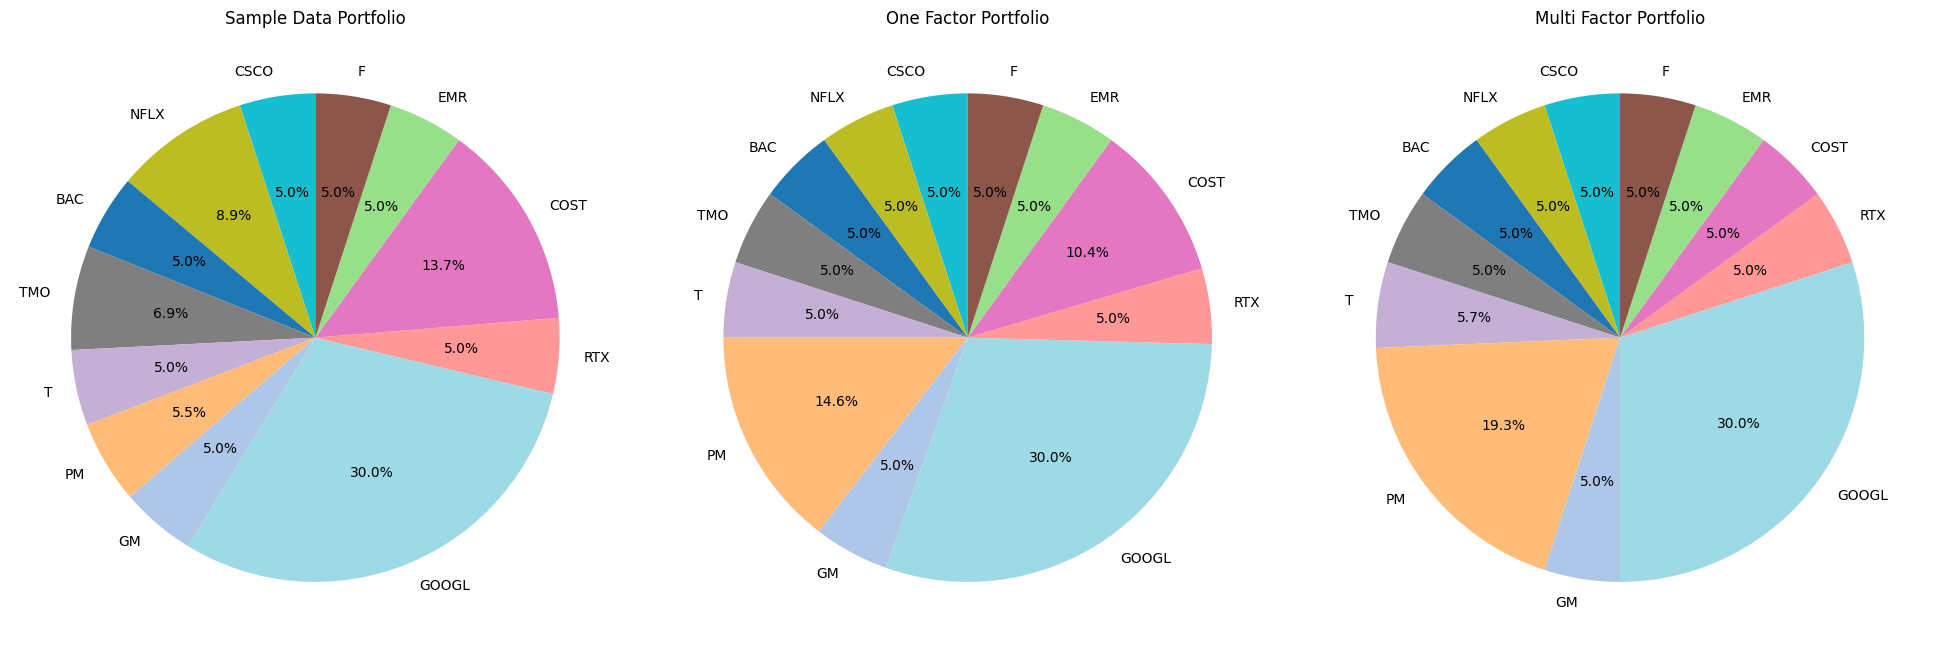

In [120]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('tableau-colorblind10')

# Define data
labels = Weight.index.tolist()[:-3]  # Exclude 'Er-Ef', 'Sigma', 'Sharpe Ratio' from labels
sample_data_weights = optimized_weights_sample_data  # Exclude 'Er-Ef', 'Sigma', 'Sharpe Ratio' from weights
one_factor_weights = optimized_weights_one_factor  # Exclude 'Er-Ef', 'Sigma', 'Sharpe Ratio' from weights
multi_factor_weights = optimized_weights_multi_factor  # Exclude 'Er-Ef', 'Sigma', 'Sharpe Ratio' from weights

# Create a custom color palette
num_colors = len(labels)
np.random.seed(42)  # For reproducibility
colors = plt.cm.get_cmap('tab20', num_colors)  # Using 'tab20' which has 20 different colors

# Generate colors
data_colors = [colors(i) for i in np.random.permutation(num_colors)]

# Create pie chart
fig, ax = plt.subplots(1, 3, figsize=(20, 10))  # Increased figure size

# Sample Data portfolio
ax[0].pie(sample_data_weights, labels=labels, autopct='%1.1f%%', startangle=90, colors=data_colors)
ax[0].set_title('Sample Data Portfolio')

# One Factor portfolio
ax[1].pie(one_factor_weights, labels=labels, autopct='%1.1f%%', startangle=90, colors=data_colors)
ax[1].set_title('One Factor Portfolio')

# Multi Factor portfolio
ax[2].pie(multi_factor_weights, labels=labels, autopct='%1.1f%%', startangle=90, colors=data_colors)
ax[2].set_title('Multi Factor Portfolio')

plt.tight_layout(pad=3.0)  # Increased spacing between subplots
plt.show()